<a href="https://colab.research.google.com/github/alaa-alt/ITI/blob/main/Machine_Learning_I/Polynomial_regression_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing and regularization

In [ ]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 378 (delta 74), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (378/378), 42.71 MiB | 15.35 MiB/s, done.
Resolving deltas: 100% (197/197), done.
/content/machine_learning_1/polynomial_regression


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

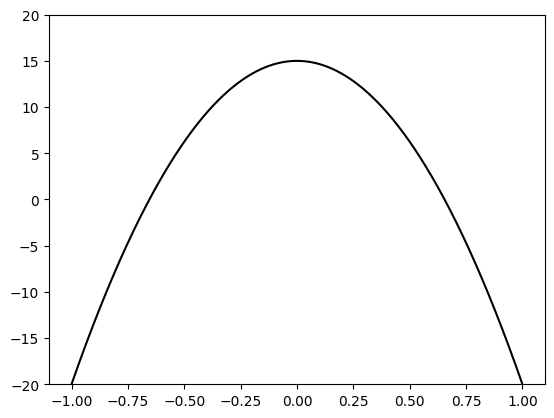

In [ ]:
# Our original polynomial is -35x^2+x+15
coefs = [15,0,-35]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [ ]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

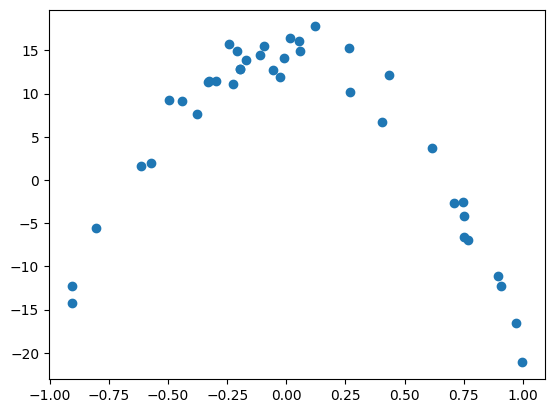

In [ ]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [ ]:
for datasample in zip(X,Y):
    print(datasample)

(-0.05674916980742406, 12.696877029585067)
(0.01720026012526632, 16.381546651270863)
(-0.3771079979995864, 7.6446457594277994)
(-0.4981346703557259, 9.296729165859254)
(0.12120043770704791, 17.76599038631538)
(-0.32816689105307884, 11.487558070224422)
(-0.9086070128631667, -14.180642865823636)
(0.9062586796555978, -12.291301534214242)
(-0.29554887696898513, 11.497941267169386)
(0.8938116713157822, -11.127780896414322)
(0.2674957044985051, 10.198301821524005)
(-0.2239655293749887, 11.057624782998108)
(-0.1711640234455054, 13.910138070302377)
(-0.6153809175106484, 1.6560127443212522)
(-0.33119661867499683, 11.35011740484624)
(-0.2427038593538111, 15.780816174522531)
(0.7508467834260344, -6.614233944672378)
(-0.1954658497618409, 12.803596974411672)
(0.40365924786735086, 6.730945350448019)
(-0.9064406280864035, -12.309003995178127)
(-0.10929562056234032, 14.51401710401855)
(0.05514626033522929, 16.063268712596976)
(-0.0254687978619359, 11.867292186190483)
(0.7677503084974018, -6.8936257849

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    X_reshape = X.reshape(-1,1)
    poly = PolynomialFeatures(degree=polyDegree, include_bias=False)
    new_poly = poly.fit_transform(X_reshape)

    return new_poly
X_poly=addPoly(X,200)

In [ ]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[-5.67491698e-002  3.22046827e-003 -1.82758901e-004  1.03714159e-005
 -5.88569242e-007  3.34008159e-008 -1.89546857e-009  1.07566268e-010
 -6.10429640e-012  3.46413753e-013 -1.96586929e-014  1.11561450e-015
 -6.33101967e-017  3.59280111e-018 -2.03888480e-019  1.15705020e-020
 -6.56616381e-022  3.72624345e-023 -2.11461222e-024  1.20002488e-025
 -6.81004158e-027  3.86464206e-028 -2.19315228e-029  1.24459571e-030
 -7.06297735e-032  4.00818101e-033 -2.27460945e-034  1.29082198e-035
 -7.32530756e-037  4.15705123e-038 -2.35909206e-039  1.33876516e-040
 -7.59738114e-042  4.31145072e-043 -2.44671249e-044  1.38848903e-045
 -7.87955995e-047  4.47158486e-048 -2.53758728e-049  1.44005972e-050
 -8.17221934e-052  4.63766663e-053 -2.63183731e-054  1.49354582e-055
 -8.47574856e-057  4.80991694e-058 -2.72958793e-059  1.54901849e-060
 -8.79055134e-062  4.98856491e-063 -2.83096917e-064  1.60655150e-065
 -9.11704640e-067  5.17384814e-068 -2.93611587e-069  1.66622138e-070
 -9.45566800e-072  5.366

## Splitting data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y,  test_size=0.2)

In [ ]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [ ]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data
lin = LinearRegression()
model_no_reg = lin.fit(X_train, y_train)

Training error (rmse): 0.4689056473160857
Testing error (rmse): 64818354854.71412


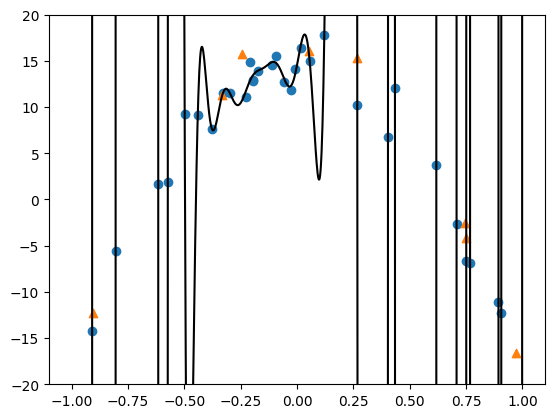

Polynomial coefficients
[14.509712286733567, 127.75544597638134, 940.2842057626709, -40870.527981921376, -458058.3843908993, 1686945.2838974583, 37783230.610616475, 77087616.46232459, -788128796.424557, -3181305742.7754793, 5452047795.911474, 39741125353.00706, -1009524650.5419933, -232849806934.1525, -142421188775.9094, 696528468558.7502, 591311452972.3993, -1002343241238.5782, -758806866825.1902, 408906347215.86743, -215833998300.72745, 397157468809.1944, 645835964281.7019, -117118764334.07745, 526463107276.0204, -264334890991.8177, -60597234994.51841, -141879286212.22403, -464959135728.1607, 15636222320.023338, -518071548929.17786, 115603666698.7601, -340734661075.5429, 154969298193.43048, -96004341363.15198, 152153023470.50803, 111899932569.01326, 122779287090.54474, 243399280033.5726, 77705406692.00032, 299290930489.05396, 25135432714.91091, 297834364623.7222, -28175860716.796104, 260549447839.273, -77090401081.9642, 205737516244.70795, -118110929580.2206, 146487564233.8134, -1495

In [ ]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [ ]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data
lasso_func = linear_model.Lasso()
model_L1_reg = lasso_func.fit(X_train, y_train)

Training error (rmse): 3.816177916327029
Testing error (rmse): 4.538952970321361


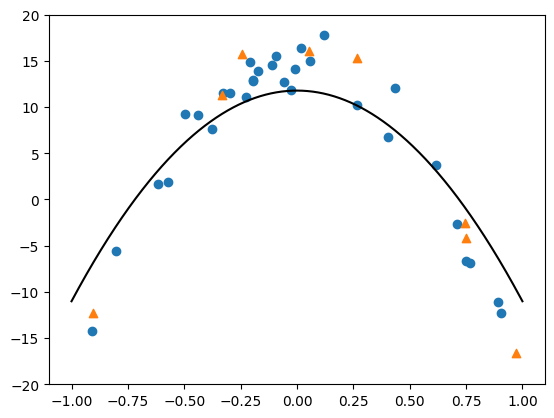

Polynomial coefficients
[11.783991500768137, -0.0, -22.799918674880402, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0

In [ ]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [ ]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data
model_L2_reg = linear_model.Ridge().fit(X_train, y_train)

Training error (rmse): 2.8127511566112373
Testing error (rmse): 3.17534881178786


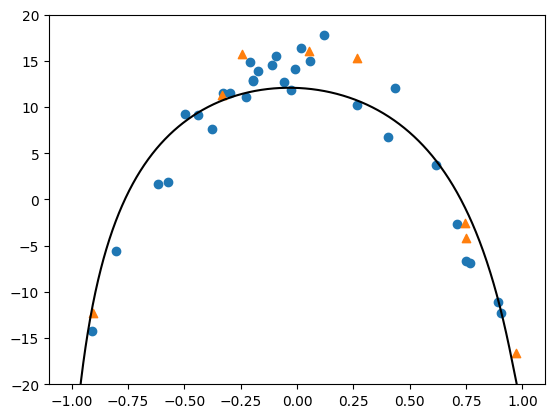

Polynomial coefficients
[12.072793970481666, -0.9955640579408369, -14.549432038736894, -0.568239335365206, -8.46035131811884, -0.12407176624850802, -5.102621070649596, 0.25603973172268657, -3.237517583254877, 0.4630801142501052, -2.148296750349495, 0.5370192402226868, -1.482032907619541, 0.5332465066015479, -1.0569438085478047, 0.491285646073525, -0.7750077116467003, 0.4345910243526726, -0.581225065221465, 0.3756816393055872, -0.4436452520020424, 0.32057193015763474, -0.34311655057176194, 0.27168984114816364, -0.2678145106873347, 0.2296079532687991, -0.2102232217173376, 0.1940117974415701, -0.16542368719028916, 0.16421768551526092, -0.13010051515959603, 0.1394369599705671, -0.10195334583955168, 0.11890234174873168, -0.07934108852009394, 0.10192165363157252, -0.06106249180455129, 0.08789473928004253, -0.046217885075530915, 0.07631276706761081, -0.034120048313834056, 0.06674993595936193, -0.02423533143053801, 0.05885263797634542, -0.01614374805433211, 0.0523284970376595, -0.0095112159849

In [ ]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [ ]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,0.055146,16.063269,1.528609e+01,11.714654,11.973472
1,-0.242704,15.780816,1.076016e+01,10.440959,11.435159
2,-0.906441,-12.309004,-5.469074e+08,-6.949211,-11.495529
3,0.266178,15.304202,5.053370e+01,10.168606,10.721739
4,0.973643,-16.568876,-1.833332e+11,-9.829889,-19.884587
5,-0.331197,11.350117,1.131343e+01,9.283041,10.718541
6,0.747308,-2.579131,-3.469999e+04,-0.949050,-0.984339
7,0.750033,-4.195901,-7.987183e+03,-1.042080,-1.121060


### Real Example (Predict fuel efficiency)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### using 50th order

In [ ]:
from sklearn import preprocessing

X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X

X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)
scaler=preprocessing.StandardScaler().fit(X_trainPoly)

X_trainPoly=scaler.transform(X_trainPoly)
X_testPoly=scaler.transform(X_testPoly)

##### no regularization

In [ ]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

3062.8548221856595


##### lasso regularization

In [ ]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.5)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.383251699910778


##### ridge regularization

In [ ]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.5)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.210997782920175
